In [ ]:
import numpy as np
import pandas as pd

# Set random seed for NumPy
np.random.seed(42)

In [ ]:
# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.shape

(300000, 11)

In [ ]:
test_df.shape

(200000, 10)

In [ ]:
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
train_df.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [ ]:
print(train_df['Price'].max())
print(train_df['Price'].min())

150.0
15.0


In [ ]:
skewness = train_df['Price'].skew()
print(f"Skewness of Price: {skewness}")

Skewness of Price: 0.036882755131099065


In [ ]:
train_df['Size'].value_counts()

,count
Size,
Medium,101906
Large,98643
Small,92856


In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<Axes: >

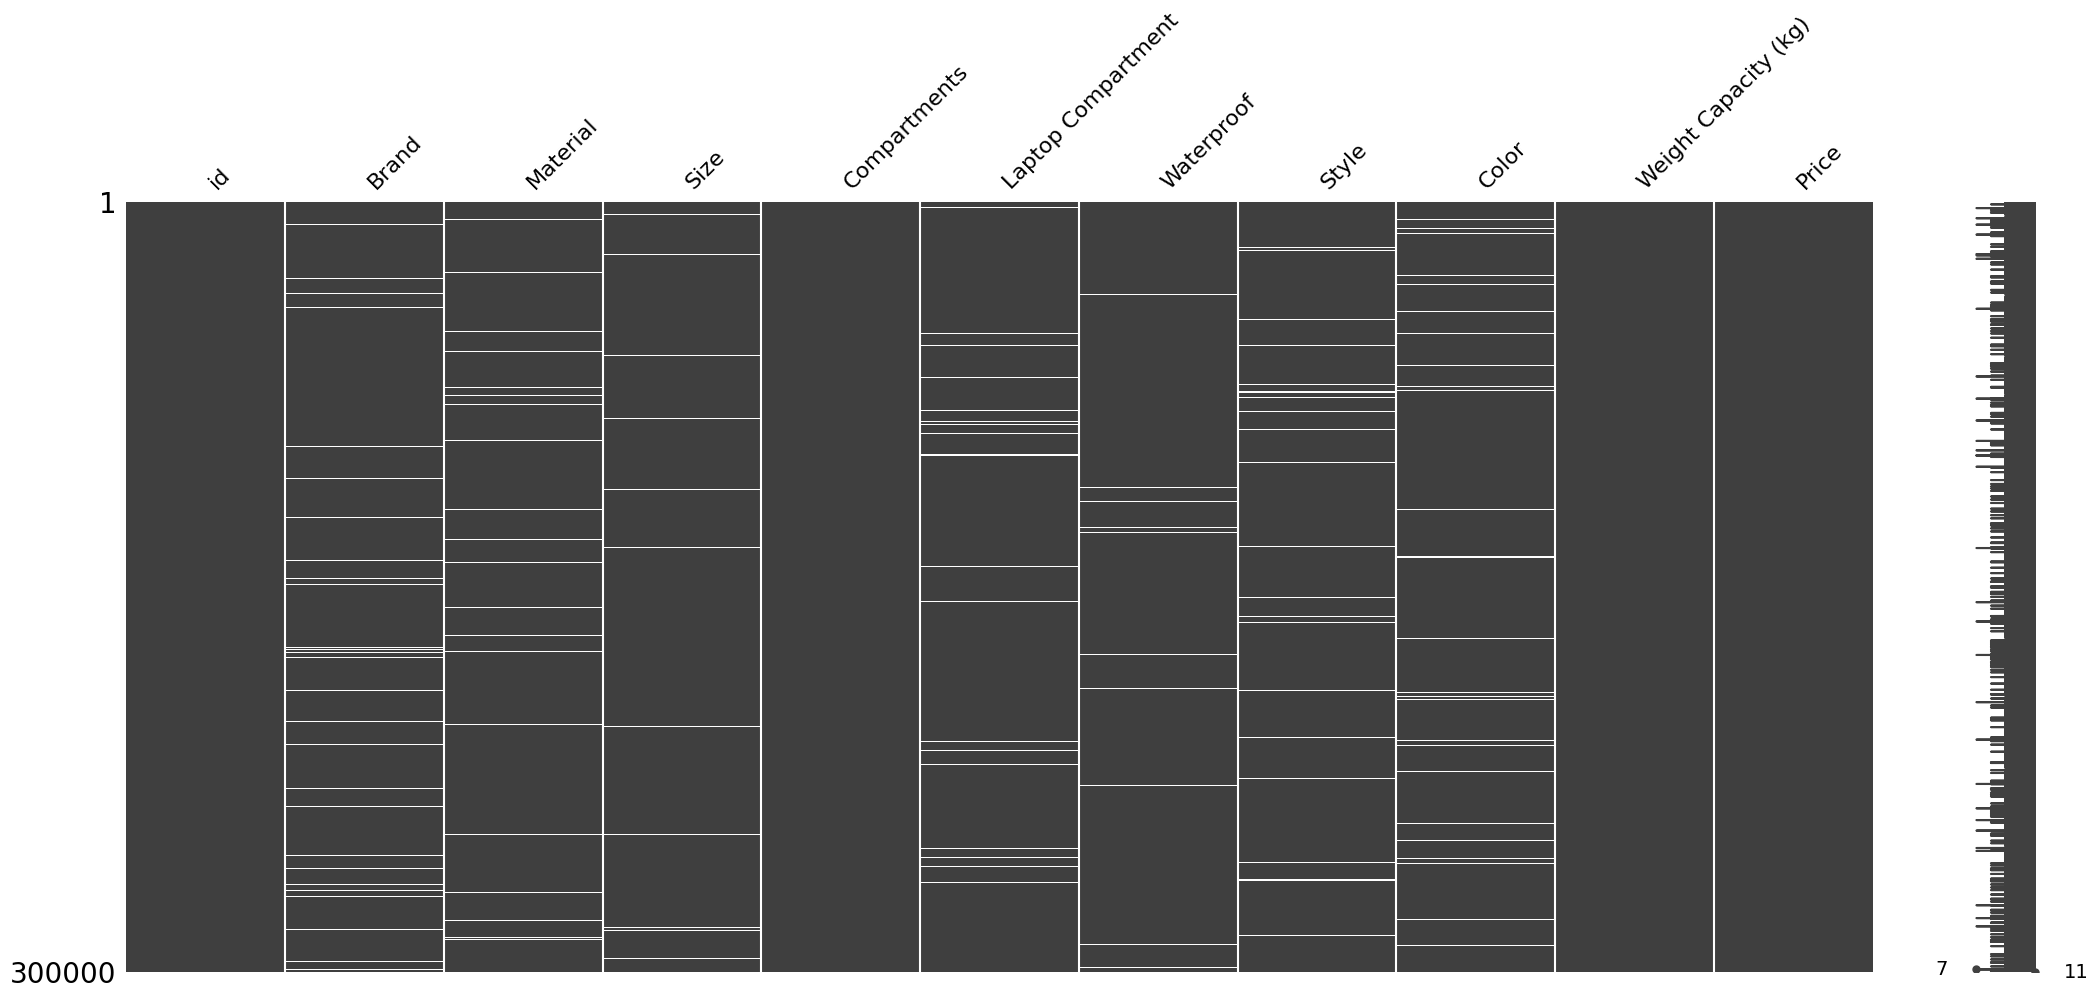

In [ ]:
msno.matrix(train_df)

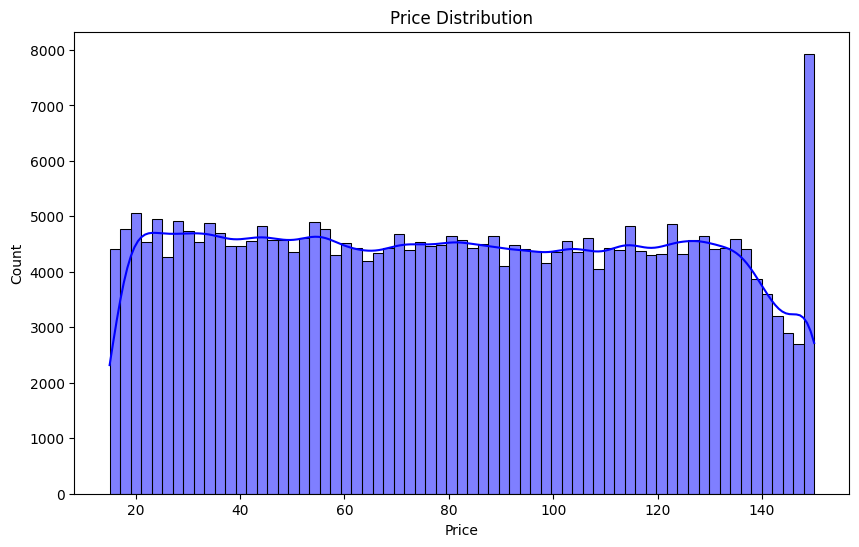

In [ ]:
# Visualize the distribution of the target variable 'Price'
plt.figure(figsize=(10,6))
sns.histplot(train_df['Price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.show()

<ipython-input-14-43e9bde2ae7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=train_df, palette='viridis')


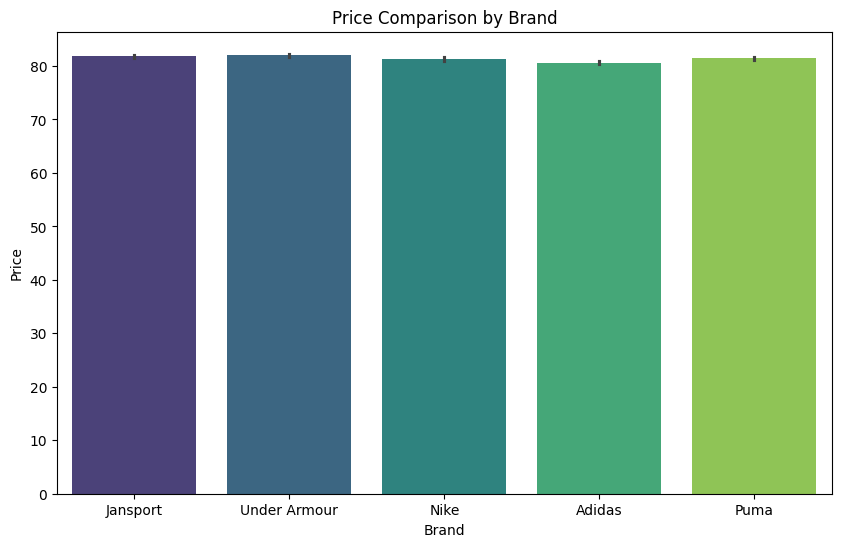

In [ ]:
# Bar plot of price for each brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Price', data=train_df, palette='viridis')
plt.title('Price Comparison by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

<ipython-input-15-21cde4a0dbdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Material', y='Price', data=train_df, palette='Set2')


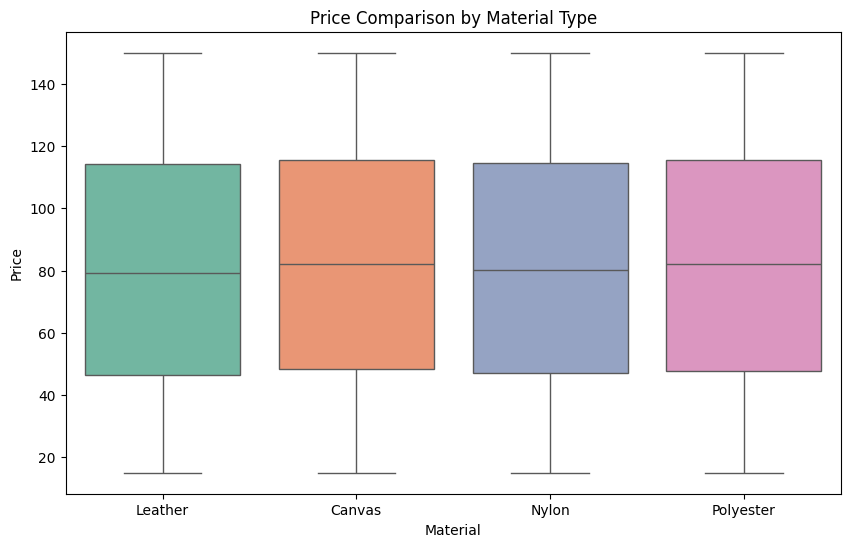

In [ ]:
# 3. Box Plot: Comparison of Material Types by Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Price', data=train_df, palette='Set2')
plt.title('Price Comparison by Material Type')
plt.xlabel('Material')
plt.ylabel('Price')
plt.show()

In [ ]:
# Machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Function for feature engineering
def create_features(df):


    # Define weight capacity bins
    bins = [0, 5, 10, 20, 30]  # Example weight capacity bins
    labels = ['Light', 'Medium', 'Heavy', 'Extra Heavy']  # Corresponding labels

    df['weight_capacity_category'] = pd.cut(df['Weight Capacity (kg)'], bins=bins, labels=labels)

    return df

train_df = create_features(train_df)
test_df  =create_features(test_df)

In [ ]:
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,weight_capacity_category
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,Heavy
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,Extra Heavy
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,Heavy
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,Heavy
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,Heavy


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   id                        300000 non-null  int64   
 1   Brand                     290295 non-null  object  
 2   Material                  291653 non-null  object  
 3   Size                      293405 non-null  object  
 4   Compartments              300000 non-null  float64 
 5   Laptop Compartment        292556 non-null  object  
 6   Waterproof                292950 non-null  object  
 7   Style                     292030 non-null  object  
 8   Color                     290050 non-null  object  
 9   Weight Capacity (kg)      299862 non-null  float64 
 10  Price                     300000 non-null  float64 
 11  weight_capacity_category  299862 non-null  category
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 25.5+ MB


In [ ]:
categorical_cols = ['Brand','Size','Material', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

for col in categorical_cols:
    train_df[col].fillna('Unknown', inplace=True)
    test_df[col].fillna('Unknown', inplace=True)

In [ ]:
# Handle missing numerical values (fill with mean or drop rows)

train_df['Weight Capacity (kg)'].fillna(train_df['Weight Capacity (kg)'].mean(), inplace=True)
test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].mean(), inplace=True)

In [ ]:
train_df.isnull().sum()

,0
id,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0


In [ ]:
# One-Hot Encoding for categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)
test_df  = pd.get_dummies(test_df, drop_first=True)

In [ ]:
X = train_df.drop(columns=['Price', 'id'])
y = train_df['Price']

In [ ]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=2000,  # Number of trees
    max_depth=8,  # Maximum depth of each tree
    learning_rate=0.006,  # Step size at each iteration
    subsample=0.7,  # Fraction of samples used for each tree
    colsample_bytree=0.7,  # Fraction of features used for each tree
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.006, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate performance using RMSE
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE : {rmse_gb:.4f}")

RMSE : 38.9618


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with RMSE as the evaluation metric
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Calculate and print the average RMSE across all folds
average_rmse = -cv_scores.mean()  # Convert negative RMSE to positive
print(f"Average RMSE from 5-fold cross-validation: {average_rmse:.4f}")


Average RMSE from 5-fold cross-validation: 39.1157


In [ ]:
# Prepare the test dataset
X_test = test_df.drop(columns=['id'])
X_test_scaled = scaler.transform(X_test)

# Predictions using the best model (Random Forest)
final_predictions = model.predict(X_test_scaled)

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'Price': final_predictions
})

# Save the submission file
#submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

,id,Price
0,300000,82.733170
1,300001,83.338753
2,300002,84.132843
3,300003,79.301003
4,300004,76.286339


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='id', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)